In [2]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import binom
import numpy as np

In [3]:
session = fastf1.get_session(2019, 'Bahrain', 'R')
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.2]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/usr/local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/usr/local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns

In [4]:
best_bottas = session.laps.pick_driver('MAX').pick_fastest()

/usr/local/lib/python3.11/site-packages/fastf1/core.py:2328: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [7]:
session_max_verstappen = session.laps.pick_driver('MAX')

In [8]:
session.laps.to_csv('./2019_Bahrain_Race.csv')

# Question 1

Text(0.5, 1.0, 'Lap times of Max Verstappen in Bahrain 2019 (Histogram)')

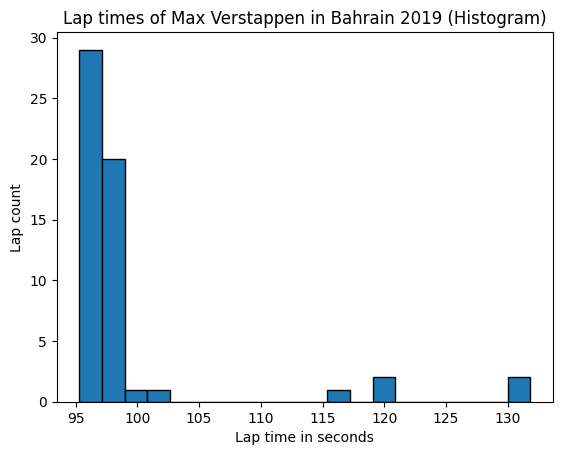

In [95]:
# check if we have a normal distribution of lap times
plt.hist(session_max_verstappen['LapTime'].dt.total_seconds(), edgecolor='black', bins=20)
plt.xlabel('Lap time in seconds')
plt.ylabel('Lap count')
plt.title('Lap times of Max Verstappen in Bahrain 2019 (Histogram)')

This is not anormal distribution. Therefore the strategy of using one or more standard deviations to determine a 'fast' lap time wont work.

Next we try to get a more detailed picture of the data by determining the min, mean, std and median lap times

In [80]:
session_max_verstappen['LapTime'].min().total_seconds()

95.311

In [56]:
# average lap time
session_max_verstappen['LapTime'].mean().total_seconds()

99.402375

In [58]:
# determine the standard deviation
session_max_verstappen['LapTime'].std().total_seconds()

7.935867

In [96]:
# see if the median can get close to the mean
session_max_verstappen['LapTime'].median().total_seconds()

96.9905

We choos anything faster than the mean lap time to be 'fast'.

In [171]:
fast_lap_time = session_max_verstappen['LapTime'].mean().total_seconds()
fast_laps = session_max_verstappen['LapTime'][session_max_verstappen['LapTime'] < pd.Timedelta(fast_lap_time, 's')]
fast_laps_soft = session_max_verstappen['LapTime'][(session_max_verstappen['LapTime'] < pd.Timedelta(fast_lap_time, 's')) & (session_max_verstappen['Compound'] == 'SOFT')]
laps_soft = session_max_verstappen[(session_max_verstappen['Compound'] == 'SOFT')]
print('fast laps', fast_laps.count())

fast laps 49


In [172]:
p_soft_is_fast = len(fast_laps_soft)/len(laps_soft)
p_soft_is_fast

0.8181818181818182

# Question 2

In [14]:
# mean and variance of soft, medium and hard tyres
laps_soft.mean()['LapTime']

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/1445143992.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  laps_soft.mean()['LapTime']
/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/1445143992.py:2: FutureWarning: The default value of numeric_only in Laps.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laps_soft.mean()['LapTime']


Timedelta('0 days 00:01:38.212700')

In [15]:
laps_soft['LapTimeSeconds'] = laps_soft['LapTime'].dt.total_seconds()
laps_soft.var()['LapTimeSeconds']

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/1570903620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_soft['LapTimeSeconds'] = laps_soft['LapTime'].dt.total_seconds()
/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/1570903620.py:2: FutureWarning: The default value of numeric_only in Laps.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laps_soft.var()['LapTimeSeconds']


0.9828695666666635

In [16]:
laps_medium = session_max_verstappen[(session_max_verstappen['Compound'] == 'MEDIUM')]
laps_medium.mean()['LapTime']

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/2565777270.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  laps_medium.mean()['LapTime']
/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/2565777270.py:2: FutureWarning: The default value of numeric_only in Laps.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laps_medium.mean()['LapTime']


Timedelta('0 days 00:01:39.661000')

In [17]:
laps_medium['LapTimeSeconds'] = laps_medium['LapTime'].dt.total_seconds()
laps_medium.var()['LapTimeSeconds']

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/4248653452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_medium['LapTimeSeconds'] = laps_medium['LapTime'].dt.total_seconds()
/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_80830/4248653452.py:2: FutureWarning: The default value of numeric_only in Laps.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laps_medium.var()['LapTimeSeconds']


76.39363879999998

# Question 3

In [43]:
# Calculate mean lap time
mean_lap_time = session_max_verstappen['LapTime'].mean()

# Calculate mean tire life
mean_tire_life = session_max_verstappen['TyreLife'].mean()
print('mean_tire_life', mean_tire_life)
print('mean_lap_time', mean_lap_time)

mean_tire_life 11.491228070175438
mean_lap_time 0 days 00:01:39.402375


In [44]:
cov_numerator = 0
for lap_count, lap in session_max_verstappen.iterrows():
    if pd.Timedelta(1, 's') < lap['LapTime'] < pd.Timedelta(1000, 's'):  # required check to skip laps without lap times
        cov_numerator += pd.Timedelta((lap['LapTime'] - mean_lap_time)).total_seconds() * (lap['TyreLife'] - mean_tire_life)

cov = cov_numerator / (session_max_verstappen['LapTime'].count() - 1)

# Calculate the standard deviations
std_dev_lap_time = session_max_verstappen['LapTime'].std()
std_dev_tire_life_in_seconds = (session_max_verstappen['TyreLife'] * session_max_verstappen['LapTime']).std()

# Calculate the correlation coefficient
corr_coeff = cov / (session_max_verstappen['LapTime'].std().total_seconds() * session_max_verstappen['TyreLife'].std())
print('cov', cov)
print('corr_coeff', corr_coeff)

cov 13.859143181818181
corr_coeff 0.27189857855295785


In [31]:
# This can be verified with the pandas corr() function
session_max_verstappen['TyreLife'].corr(session_max_verstappen['LapTime'].dt.total_seconds())

0.27285421917460057

# Question 4

In [ ]:
# these are our two tire changes of the race
session_max_verstappen[session_max_verstappen['PitInTime'].isnull() != True]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
181,0 days 00:51:34.907000,33,0 days 00:01:40.633000,11,NaT,0 days 00:51:33.169000,0 days 00:00:30.906000,0 days 00:00:43.032000,0 days 00:00:26.695000,0 days 00:50:25.180000,...,SOFT,14.0,False,1,0 days 00:49:54.274000,Red Bull Racing,VER,1,False,2019-03-31 15:29:54.359
202,0 days 01:26:01.257000,33,0 days 00:01:41.540000,32,NaT,0 days 01:25:59.566000,0 days 00:00:31.532000,0 days 00:00:43.389000,0 days 00:00:26.619000,0 days 01:24:51.249000,...,MEDIUM,21.0,True,2,0 days 01:24:19.717000,Red Bull Racing,VER,1,False,2019-03-31 16:04:19.802


In [ ]:
# now calculate the rate of tire change
# we have 2 tire changes in 53 laps
# so the rate is 2/53
lamb = 2/53
def poisson(k, lamb):
    return (lamb**k * np.exp(-lamb)) / np.math.factorial(k)

poisson(2, lamb)

0.000685629958001216